# **MINOR PROJECT**

---






In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#loading dataset
df=pd.read_csv('movies.csv')

In [ ]:
df.head(10)

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0
5,6,$pent,2000,91,NaN,4.3,45,4.5,4.5,4.5,...,14.5,14.5,NaN,0,0,0,1,0,0,0
6,7,$windle,2002,93,NaN,5.3,200,4.5,0.0,4.5,...,4.5,14.5,R,1,0,0,1,0,0,0
7,8,'15',2002,25,NaN,6.7,24,4.5,4.5,4.5,...,4.5,14.5,NaN,0,0,0,0,1,0,1
8,9,'38,1987,97,NaN,6.6,18,4.5,4.5,4.5,...,4.5,24.5,NaN,0,0,0,1,0,0,0
9,10,'49-'17,1917,61,NaN,6.0,51,4.5,0.0,4.5,...,4.5,4.5,NaN,0,0,0,0,0,0,0


In [ ]:
#dropping columns
df=df.drop(columns=[ 'budget','mpaa'])


In [ ]:
#renaming column
df=df.rename({'Unnamed: 0': 'index'}, axis='columns')

In [ ]:
df.shape

(58788, 23)

# **TASK 1** - Exploratory Data Analysis



```
```

##What is the distribution of movie ratings in the dataset? Are the ratings normally distributed or skewed? Can you calculate the mean, median, and standard deviation of the ratings?

In [ ]:
df.columns

Index(['index', 'title', 'year', 'length', 'rating', 'votes', 'r1', 'r2', 'r3',
       'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'Action', 'Animation',
       'Comedy', 'Drama', 'Documentary', 'Romance', 'Short'],
      dtype='object')

In [ ]:
df['index']

0            1
1            2
2            3
3            4
4            5
         ...  
58783    58784
58784    58785
58785    58786
58786    58787
58787    58788
Name: index, Length: 58788, dtype: int64

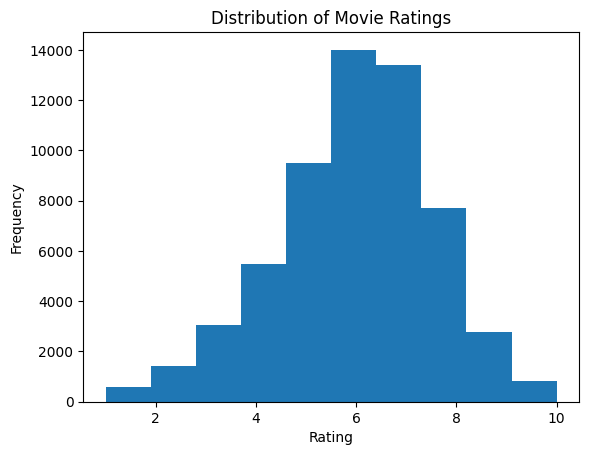

In [ ]:
ratings = df['rating']

# Calculate mean, median, and standard deviation
mean_rating = ratings.mean()
median_rating = ratings.median()
std_deviation = ratings.std()

# Plot the distribution of ratings
plt.hist(ratings, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()



In [ ]:
#finding skewness
df[['rating']].skew(axis = 0, skipna = True)

rating   -0.405717
dtype: float64

In [ ]:
# Print the mean, median, and standard deviation
print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Standard Deviation:", std_deviation)

Mean Rating: 5.932850241545893
Median Rating: 6.1
Standard Deviation: 1.553030800154227


**Summary: -** By examining the histogram and the mean, median, and standard deviation values, We can gain insights into the distribution of movie ratings. The distribution appears symmetrical and nearly bell-shaped, but the Skewness value also shows the rating column has very minor alignment towards the lower rating but from the distribution plot and Mean/Median values we can see that the overall rating is aligned towards mid-way rating between 5-7, which shows the data is almost normally distributed. Also the deviation in data is also very small.

##How does the movie genre (e.g., Action, Animation, Comedy, Drama, Documentary, Romance) affect the movie ratings? Can you compare the average ratings for different genres using a suitable plot, such as a bar plot or boxplot?

In [ ]:
#intermingling columns  Action, Animation, Comedy, Drama, Documentary, Romance,short into  single column genre

In [ ]:
row_no = df.shape[0]
genre = []
for i in range(row_no):
  if df['Action'][i] == 1:
    genre.append("Action")
  elif df['Animation'][i] == 1:
    genre.append("Animation")
  elif df['Comedy'][i] == 1:
    genre.append("Comedy")
  elif df['Drama'][i] == 1:
    genre.append("Drama")
  elif df['Documentary'][i] == 1:
    genre.append("Documentary")
  elif df['Romance'][i] == 1:
    genre.append("Romance")
  elif df['Short'][i] == 1:
    genre.append("Short")
  else:
    genre.append("None")

df['Genre'] = genre

In [ ]:
avg_ratings = df.groupby('Genre')['rating'].mean()
avg_ratings

Genre
Action         5.292022
Animation      6.590627
Comedy         5.872612
Documentary    6.656645
Drama          6.189352
None           5.448045
Romance        6.058276
Short          6.287372
Name: rating, dtype: float64

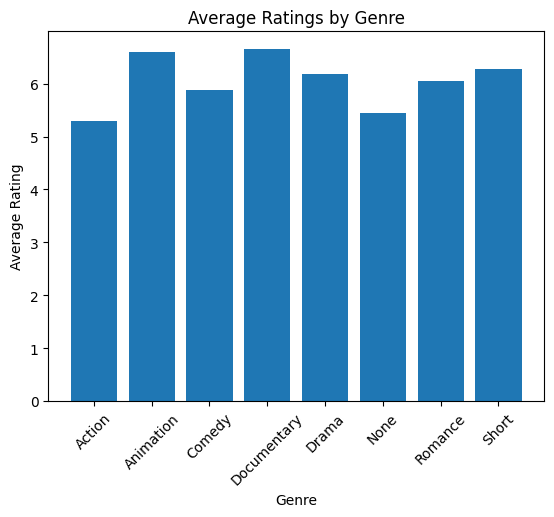

In [ ]:
#plotting a graph b/w average rating& genres
avg_ratings = df.groupby('Genre')['rating'].mean()
plt.bar(avg_ratings.index, avg_ratings.values)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.xticks(rotation=45)
plt.show()

This bar plot shows that animation and documentary movies have a greater popularity among these genres.

**Summary: -** From this Bar Plot we can clearly see that Animation and Documentry genres have received the highest average rating while Action genre received the lowest average rating among all. Also There are also some movies found in the dataset which has not been tagged with any genre which we can consider as standalone. Apart from this remaining genres (Comedy, Drama, Romance and Short movie) also received nearly same average rating as compared to each other.

##Is there any relationship between the movie duration and its rating? Can you calculate the correlation coefficient between these variables and determine if there is a significant relationship?

In [ ]:
# Define duration ranges
duration_ranges = [0, 60, 90, 120, 150, float('inf')]
duration_labels = ['<60', '60-90', '90-120', '120-150', '>150']

# Group movies into duration ranges and calculate average rating
df['Duration'] = pd.cut(df['length'], bins=duration_ranges, labels=duration_labels)
avg_rating = df.groupby('Duration')['rating'].mean()
avg_rating



Duration
<60        6.414414
60-90      5.575644
90-120     5.867547
120-150    6.706082
>150       6.998009
Name: rating, dtype: float64

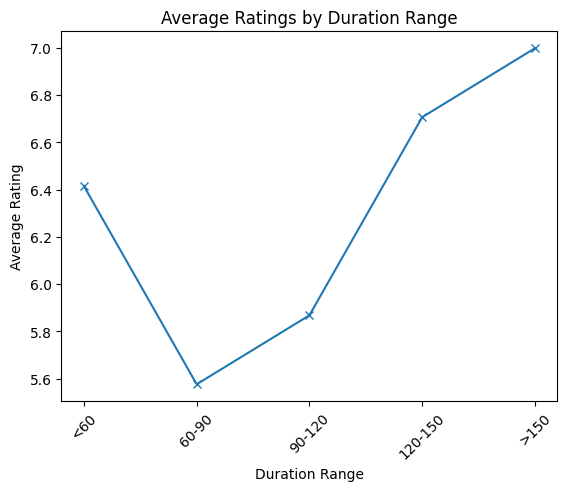

In [ ]:
# Create a line plot b/w average rating & duration
plt.plot(avg_rating.index, avg_rating.values, marker='x')


plt.xlabel('Duration Range')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Duration Range')
plt.xticks(rotation=45)
plt.show()

In [ ]:
correlation = df['rating'].corr(df['length'])

# Print the correlation coefficient
print("The Correlation coefficient between rating and Duration of movie is:", correlation)

The Correlation coefficient between rating and Duration of movie is: -0.030734414103833138


In [ ]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(df['rating'], df['length'])

# Print the correlation coefficient and p-value
print("The Correlation coefficient between rating and Duration of movie is:", correlation)
print("The Pearson coefficient (p-value) between rating and Duration of movie is:", p_value)

The Correlation coefficient between rating and Duration of movie is: -0.03073441410383314
The Pearson coefficient (p-value) between rating and Duration of movie is: 9.086772303813051e-14


**Summary: -**  The correlation values comes out as a little less than zero which is because there are two duration Bins (60-90 & 90-120) which have the lowest rating than the rating of duration <60. This means as the duration increases rating decreases for these two duration BINS (60-90 & 90-120) as compared to BIN <60. But after that when duration increases the rating values increases. If we skip the first duration BIN (i.e. <60), then it clearly represent that if the duration increases the average rating value also increases.

To understand more better on correlation, I have also calculated the pearson coeeficient (i.e. p-value) to represents the probability of obtaining the observed correlation coefficient if the null hypothesis (no correlation) is true. If the p-value is less than a chosen significance level (e.g., 0.05), it suggests that there is a significant relationship between movie duration and its rating.

##Are there any significant differences in the average ratings between old and new movies? Can you compare the average ratings for movies released before a certain year (e.g., 2000) and movies released after that year?->

In [ ]:
cutoff_year = 2000

# Create two groups based on the release year
old_movies = df[df['year'] <= cutoff_year]
new_movies = df[df['year'] > cutoff_year]
avg_rating_old = old_movies['rating'].mean()

# Calculate average ratings for new movies
avg_rating_new = new_movies['rating'].mean()

In [ ]:
from scipy import stats

# Perform t-test
t_statistic, p_value = stats.ttest_ind(old_movies['rating'], new_movies['rating'])

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -27.304784304814422
p-value: 3.9036520145561285e-163


Summarizing your analysis and observations

> The t-test compares the means of the two groups and returns a t-statistic and a p-value. The p-value indicates the probability of observing the given difference in average ratings by chance. A small p-value (typically below a chosen significance level, e.g., 0.05) suggests a statistically significant difference in average ratings between old and new movies.



**Summary: -** The t-test compares the means of the two groups and returns a t-statistic and a p-value. The p-value indicates the probability of observing the given difference in average ratings by chance. A small p-value (typically below a chosen significance level, e.g., 0.05) suggests a statistically significant difference in average ratings between old and new movies.



##Can you identify the top-rated movies based on the average ratings across all genres? Can you create a list or plot to showcase the top-rated movies and their corresponding ratings?

Summarizing your analysis and observation

In [ ]:
set(df['Genre'])

{'Action',
 'Animation',
 'Comedy',
 'Documentary',
 'Drama',
 'None',
 'Romance',
 'Short'}

In [ ]:
# Calculate average rating for each movie
avg_rating1 = df.groupby('title')['rating'].mean()

# Sort movies based on average rating in descending order
top_rated_movies = avg_rating1.sort_values(ascending=False)

# Print the top-rated movies
print(top_rated_movies.head(10))


title
Fishing for Love                           10.0
Dimensia Minds Trilogy: The Hope Factor    10.0
Summer Sonata, A                           10.0
Dimensia Minds Trilogy: The Reds            9.9
Of Age                                      9.9
Defilada                                    9.9
Himala                                      9.9
Shopping Part, The                          9.9
Sky of an Archangel                         9.9
New World, The                              9.9
Name: rating, dtype: float64


In [ ]:
# Forming the dataframe based on the maximum rated movies across each genre.
df_action = df[df['Genre']=='Action']
df_action_max = df_action[df_action['rating']==max(df_action['rating'])]
df_action_max = df_action_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_action_max['Genre'] = 'Action'
df_action_max = df_action_max[['Genre','title','rating']]

df_Animation = df[df['Genre']=='Animation']
df_Animation_max = df_Animation[df_Animation['rating']==max(df_Animation['rating'])]
df_Animation_max = df_Animation_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_Animation_max['Genre'] = 'Animation'
df_Animation_max = df_Animation_max[['Genre','title','rating']]

df_Comedy = df[df['Genre']=='Comedy']
df_Comedy_max = df_Comedy[df_Comedy['rating']==max(df_Comedy['rating'])]
df_Comedy_max = df_Comedy_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_Comedy_max['Genre'] = 'Comedy'
df_Comedy_max = df_Comedy_max[['Genre','title','rating']]

df_Documentary = df[df['Genre']=='Documentary']
df_Documentary_max = df_Documentary[df_Documentary['rating']==max(df_Documentary['rating'])]
df_Documentary_max = df_Documentary_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_Documentary_max['Genre'] = 'Documentary'
df_Documentary_max = df_Documentary_max[['Genre','title','rating']]

df_Drama = df[df['Genre']=='Drama']
df_Drama_max = df_Drama[df_Drama['rating']==max(df_Drama['rating'])]
df_Drama_max = df_Drama_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_Drama_max['Genre'] = 'Drama'
df_Drama_max = df_Drama_max[['Genre','title','rating']]

df_Romance = df[df['Genre']=='Romance']
df_Romance_max = df_Romance[df_Romance['rating']==max(df_Romance['rating'])]
df_Romance_max = df_Romance_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_Romance_max['Genre'] = 'Romance'
df_Romance_max = df_Romance_max[['Genre','title','rating']]

df_Short = df[df['Genre']=='Short']
df_Short_max = df_Short[df_Short['rating']==max(df_Short['rating'])]
df_Short_max = df_Short_max.groupby('rating')['title'].apply(' -> '.join).reset_index()
df_Short_max['Genre'] = 'Short'
df_Short_max = df_Short_max[['Genre','title','rating']]

# Concating all the dataframe together
max_rated_df = pd.concat([df_action_max, df_Animation_max, df_Comedy_max, df_Documentary_max, df_Drama_max, df_Romance_max, df_Short_max], axis=0)

max_rated_df.reset_index(drop=True)


,Genre,title,rating
0,Action,Clase z tropical -> Goodnite Charlie -> Leng m...,9.8
1,Animation,Milton Is a Shitbag -> Mumi-troll i drugie -> ...,9.8
2,Comedy,Fishing for Love,10.0
3,Documentary,Defilada,9.9
4,Drama,"Summer Sonata, A",10.0
5,Romance,Deedar -> Eternal Embrace,9.6
6,Short,Dimensia Minds Trilogy: The Hope Factor,10.0


**Summary: -**  The above table will show the list of maximum rated movie across each genre along with it's maximum rating

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [ ]:
#after data preprocessing
df.columns




Index(['index', 'title', 'year', 'length', 'rating', 'votes', 'r1', 'r2', 'r3',
       'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'Action', 'Animation',
       'Comedy', 'Drama', 'Documentary', 'Romance', 'Short', 'Genre',
       'Duration'],
      dtype='object')

In [ ]:
df.head()

,index,title,year,length,rating,votes,r1,r2,r3,r4,...,r10,Action,Animation,Comedy,Drama,Documentary,Romance,Short,Genre,Duration
0,1,$,1971,121,6.4,348,4.5,4.5,4.5,4.5,...,4.5,0,0,1,1,0,0,0,Comedy,120-150
1,2,$1000 a Touchdown,1939,71,6.0,20,0.0,14.5,4.5,24.5,...,14.5,0,0,1,0,0,0,0,Comedy,60-90
2,3,$21 a Day Once a Month,1941,7,8.2,5,0.0,0.0,0.0,0.0,...,24.5,0,1,0,0,0,0,1,Animation,<60
3,4,"$40,000",1996,70,8.2,6,14.5,0.0,0.0,0.0,...,45.5,0,0,1,0,0,0,0,Comedy,60-90
4,5,"$50,000 Climax Show, The",1975,71,3.4,17,24.5,4.5,0.0,14.5,...,24.5,0,0,0,0,0,0,0,None,60-90


In [ ]:
#checking for nan values
df.isna().sum()

index          0
title          0
year           0
length         0
rating         0
votes          0
r1             0
r2             0
r3             0
r4             0
r5             0
r6             0
r7             0
r8             0
r9             0
r10            0
Action         0
Animation      0
Comedy         0
Drama          0
Documentary    0
Romance        0
Short          0
Genre          0
Duration       0
dtype: int64

In [ ]:
#importing linear regression and train_test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#feature selection
selected_columns = ['Genre', 'title', 'length', 'rating']

# Filter the dataset with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Create the feature matrix X and the target variable y
X = df_selected[['length']]
y = df_selected['rating']



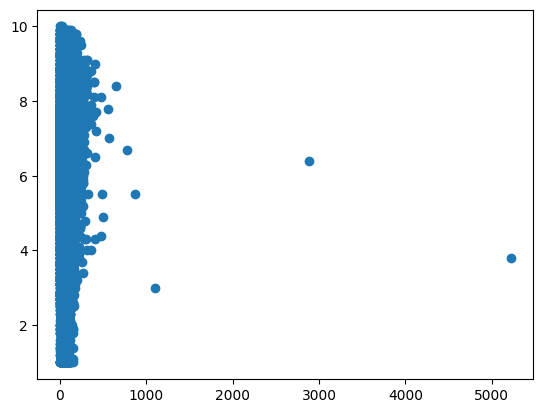

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
X.shape

(58788, 1)

In [ ]:
# Perform train-test split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)


In [ ]:
X_train.shape, y_train.shape

((47030, 1), (47030,))

In [ ]:
X_test.shape, y_test.shape

((11758, 1), (11758,))

In [ ]:
model=LinearRegression()

model.fit(X_train, y_train)

# Make predictions on the test set



LinearRegression()

In [ ]:
model.coef_

array([-0.00097051])

In [ ]:
model.intercept_

6.009780390624353

In [ ]:
y_pred = model.predict(X_test)

# Print the predicted ratings
print("Predicted Ratings:")
print(y_pred)

Predicted Ratings:
[5.9631959  5.92146396 6.0010458  ... 5.92922804 5.9156409  5.9156409 ]


In [ ]:
model.score(X_train, y_train)

0.0008198905299697801

In [ ]:
model.score(X_test, y_test)

0.0013093128596746162

In [ ]:
#summarising model efficency

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.0013093128596746162
